In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [2]:
dataset = pd.read_csv('fyp.csv') 

In [3]:
dataset.shape

(4935, 7)

In [4]:
prices_dataset_train = dataset.iloc[:3948,:]
prices_dataset_test = dataset.iloc[3949:,:]

In [5]:
trainingset = dataset.iloc[:3948,5:6].values
testset = dataset.iloc[3949:,5:6].values

In [6]:
# NORMALIZATION

In [7]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))
scaled_trainingset = min_max_scaler.fit_transform(trainingset)

In [8]:
X_train = []
y_train = []

In [9]:
for i in range(20,3948):
    X_train.append(scaled_trainingset[i-20:i,0])
    y_train.append(scaled_trainingset[i,0])

In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [12]:
# LSTM MODEL

In [13]:
# LSTM architecture

In [14]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=1))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
# Optimizer
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
3928/3928 [==============================] - 5s 1ms/step - loss: 0.0080
Epoch 2/50
3928/3928 [==============================] - 3s 886us/step - loss: 0.0027
Epoch 3/50
3928/3928 [==============================] - 4s 913us/step - loss: 0.0024
Epoch 4/50
3928/3928 [==============================] - 4s 893us/step - loss: 0.0020
Epoch 5/50
3928/3928 [==============================] - 4s 941us/step - loss: 0.0018
Epoch 6/50
3928/3928 [==============================] - 4s 977us/step - loss: 0.0016
Epoch 7/50
3928/3928 [==============================] - 3s 862us/step - loss: 0.0016
Epoch 8/50
3928/3928 [==============================] - 3s 857us/step - loss: 0.0014
Epoch 9/50
3928/3928 [==============================] - 5s 1ms/step - loss: 0.0014
Epoch 10/50
3928/3928 [==============================] - 4s 1ms/step - loss: 0.0014
Epoch 11/50
3928/3928 [==============================] - 4s 1ms/step - loss: 0.0013
Epoch 12/50
3928/3928 [

In [16]:
dataset_total = dataset.iloc[:,5:6]

In [17]:
inputs = dataset_total[len(dataset_total)-len(prices_dataset_test)-20:].values
inputs = inputs.reshape(-1,1)

In [18]:
inputs = min_max_scaler.transform(inputs)

In [19]:
X_test = []

In [20]:
for i in range(20,len(prices_dataset_test)+20):
    X_test.append(inputs[i-20:i,0])

In [21]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [22]:
predictions = model.predict(X_test)

In [23]:
predictions = min_max_scaler.inverse_transform(predictions)

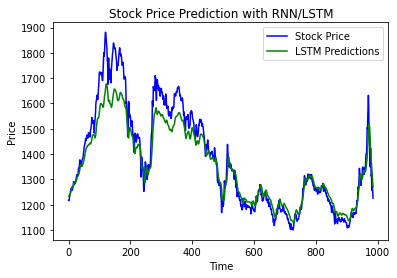

In [24]:
# Plotting
plt.plot(testset, color='blue', label='Stock Price')
plt.plot(predictions, color='green', label='LSTM Predictions')
plt.title('Stock Price Prediction with RNN/LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()